Nama: Filbert Naldo Wijaya

NIM: 2702235696

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read data

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Exploratory Data Analysis (EDA)

<Axes: >

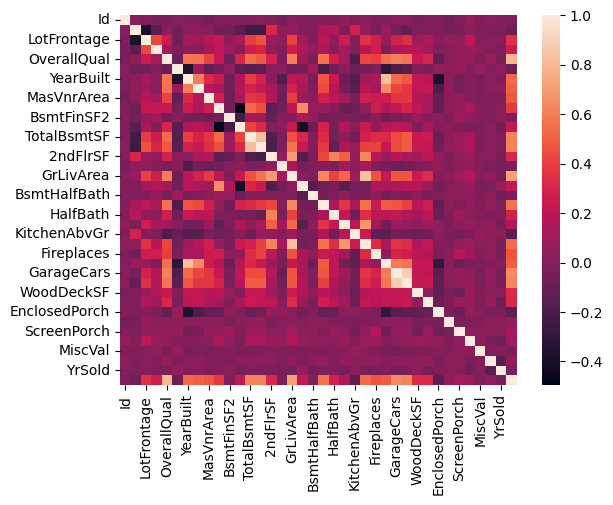

In [ ]:
# show heatmap

sns.heatmap(train_df.select_dtypes(include=['number']).corr(), annot=False)

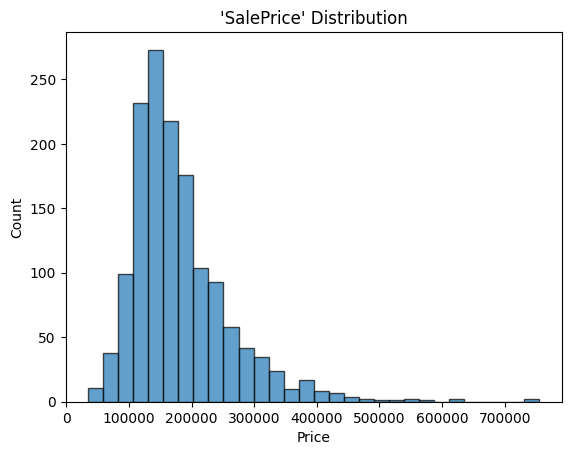

In [ ]:
# show the distribution of house sale price

plt.hist(train_df.SalePrice, bins=30, edgecolor='black', alpha=0.7)
plt.title("'SalePrice' Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

SalePrice terdistribusi secara right-skewed. Artinya, sebagian besar rumah mempunyai harga yang rendah. Namun, terdapat juga sedikit rumah yang memiliki harga tinggi

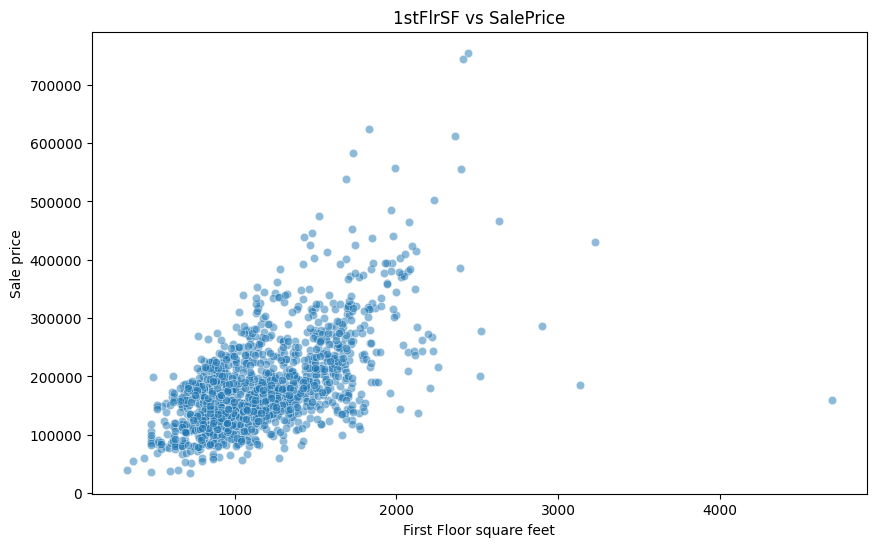

In [ ]:
# Scatterplot to see is there any correlation between first floor square feet (area of first floor) and sale price

plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_df["1stFlrSF"], y=train_df["SalePrice"], alpha=0.5)
plt.title("1stFlrSF vs SalePrice")
plt.xlabel("First Floor square feet")
plt.ylabel("Sale price")
plt.show()

Berdasarkan visualisasi, terdapat korelasi positif (relatif/cukup kuat) antara luas lantai 1 rumah dan harga rumah. Jika luas lantai 1 kecil, maka harga rumah juga akan cenderung murah. Sebaliknya, jika luas lantai 1 besar, maka harga rumah akan cenderung mahal

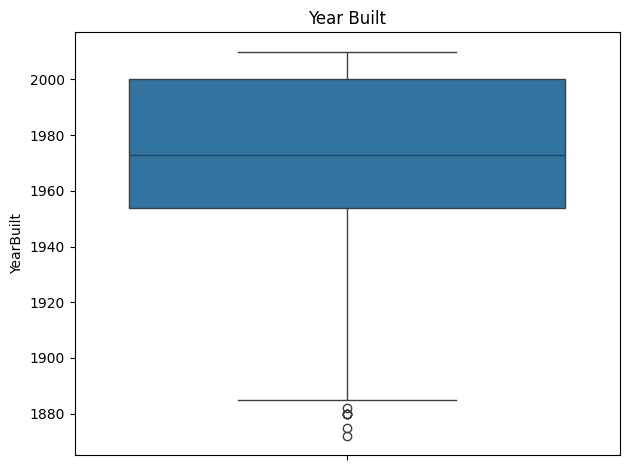

In [ ]:
# Boxplot of house year built

sns.boxplot(train_df['YearBuilt'])
plt.title("Year Built")
plt.tight_layout()
plt.show()

Median dari year built yaitu di sekitar tahun 1970 sampai 1980.

Tahun rumah dibangun sangat bervariasi.

Terdapat outliers, di mana ada beberapa rumah yang dibangun sebelum tahun 1880-an. (Usia rumah lumayan tua)

## Data Preprocessing

In [ ]:
# check train data

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# check test data

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
# check sum and percentage of missing values for each column (only show column that has missing value)

train_missing_data = train_df.isna().sum()
test_missing_data = test_df.isna().sum()

train_missing_percentage = (train_missing_data / len(train_df)) * 100
test_missing_percentage = (test_missing_data / len(test_df)) * 100

train_missing_info = train_missing_data[train_missing_data > 0]
test_missing_info = test_missing_data[test_missing_data > 0]

missing_df = pd.DataFrame({
    'Train Missing Values': train_missing_info,
    'Train Missing Percentage (%)': train_missing_percentage[train_missing_data > 0],
    'Test Missing Values': test_missing_info,
    'Test Missing Percentage (%)': test_missing_percentage[test_missing_data > 0]
})

missing_df = missing_df.sort_values(by='Train Missing Values', ascending=False)
missing_df

,Train Missing Values,Train Missing Percentage (%),Test Missing Values,Test Missing Percentage (%)
PoolQC,1453.0,99.520548,1456.0,99.794380
MiscFeature,1406.0,96.301370,1408.0,96.504455
Alley,1369.0,93.767123,1352.0,92.666210
Fence,1179.0,80.753425,1169.0,80.123372
MasVnrType,872.0,59.726027,894.0,61.274846
FireplaceQu,690.0,47.260274,730.0,50.034270
LotFrontage,259.0,17.739726,227.0,15.558602
GarageFinish,81.0,5.547945,78.0,5.346127
GarageQual,81.0,5.547945,78.0,5.346127
GarageType,81.0,5.547945,76.0,5.209047


Column PoolQC, MiscFeature, Alley, Fence, MasVnrType, FireplaceQu terlalu banyak data yang kosong. Maka column-column tersebut akan di-drop saja nantinya karena persentase data yang kosong di atas 20%.

Sisanya akan diisi berdasarkan mean, modus, median, dan sebagainya nanti.

In [ ]:
# check data size

print(len(train_df), len(test_df))

1460 1459


In [ ]:
# check if there is duplicate values

print(train_df.duplicated().sum(), test_df.duplicated().sum())

0 0


In [ ]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# show non-numeric column

train_df.select_dtypes(exclude=['number']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Data Cleaning

In [ ]:
# drop column yang persentase data kosongnya > 20 %

train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], inplace=True)
test_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], inplace=True)

In [ ]:
# filling missing values

columns_mean = ['LotFrontage', 'GarageArea'] # mean
columns_mode = ['GarageFinish', 'GarageQual', 'GarageType', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageCond', 'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual', 'MSZoning', 'SaleType', 'Utilities'] # modus

# use mean
for col in columns_mean:
    train_df[col].fillna(train_df[col].mean(), inplace=True)
    test_df[col].fillna(test_df[col].mean(), inplace=True)

# use mode (modus)
for col in columns_mode:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

# 'GarageYrBlt' = 'YearBuilt'
train_df['GarageYrBlt'].fillna(train_df['YearBuilt'], inplace=True)
test_df['GarageYrBlt'].fillna(test_df['YearBuilt'], inplace=True)

# 'TotalBsmtSF' = 'BsmtFinSF1' + 'BsmtFinSF2' + 'BsmtUnfSF'
train_df.loc[train_df['TotalBsmtSF'].isna(), 'TotalBsmtSF'] = (
    train_df['BsmtFinSF1'] + train_df['BsmtFinSF2'] + train_df['BsmtUnfSF']
)
test_df.loc[test_df['TotalBsmtSF'].isna(), 'TotalBsmtSF'] = (
    test_df['BsmtFinSF1'] + test_df['BsmtFinSF2'] + test_df['BsmtUnfSF']
)

<ipython-input-472-cd1fef160936>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mean(), inplace=True)
<ipython-input-472-cd1fef160936>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
train_df.isna().sum()[train_df.isna().sum() > 0] # all missing values already handled

,0


In [ ]:
test_df.isna().sum()[test_df.isna().sum() > 0] # all missing values already handled

,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [ ]:
categorical_columns = train_df.select_dtypes(include=['object']).columns

print(categorical_columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [ ]:
# perform encoding for categorical columns

from sklearn.preprocessing import LabelEncoder

categorical_columns = train_df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    test_df[col] = le.transform(test_df[col].astype(str))

In [ ]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


In [ ]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,8,4


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int64  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int64  
 6   LotShape       1459 non-null   int64  
 7   LandContour    1459 non-null   int64  
 8   Utilities      1459 non-null   int64  
 9   LotConfig      1459 non-null   int64  
 10  LandSlope      1459 non-null   int64  
 11  Neighborhood   1459 non-null   int64  
 12  Condition1     1459 non-null   int64  
 13  Condition2     1459 non-null   int64  
 14  BldgType       1459 non-null   int64  
 15  HouseStyle     1459 non-null   int64  
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

<Axes: >

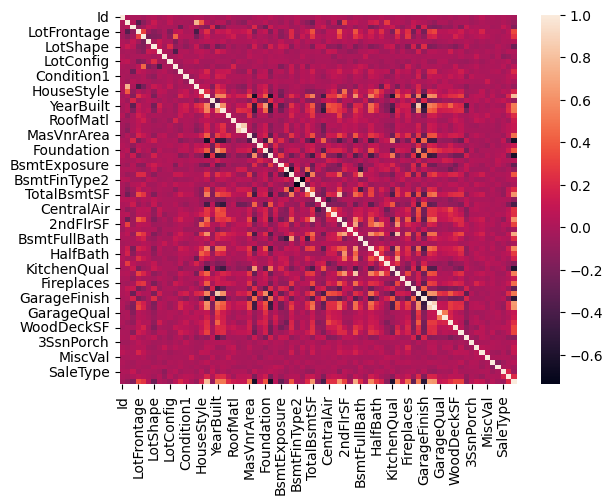

In [ ]:
# show heatmap

sns.heatmap(train_df.select_dtypes(include=['number']).corr(), annot=False)

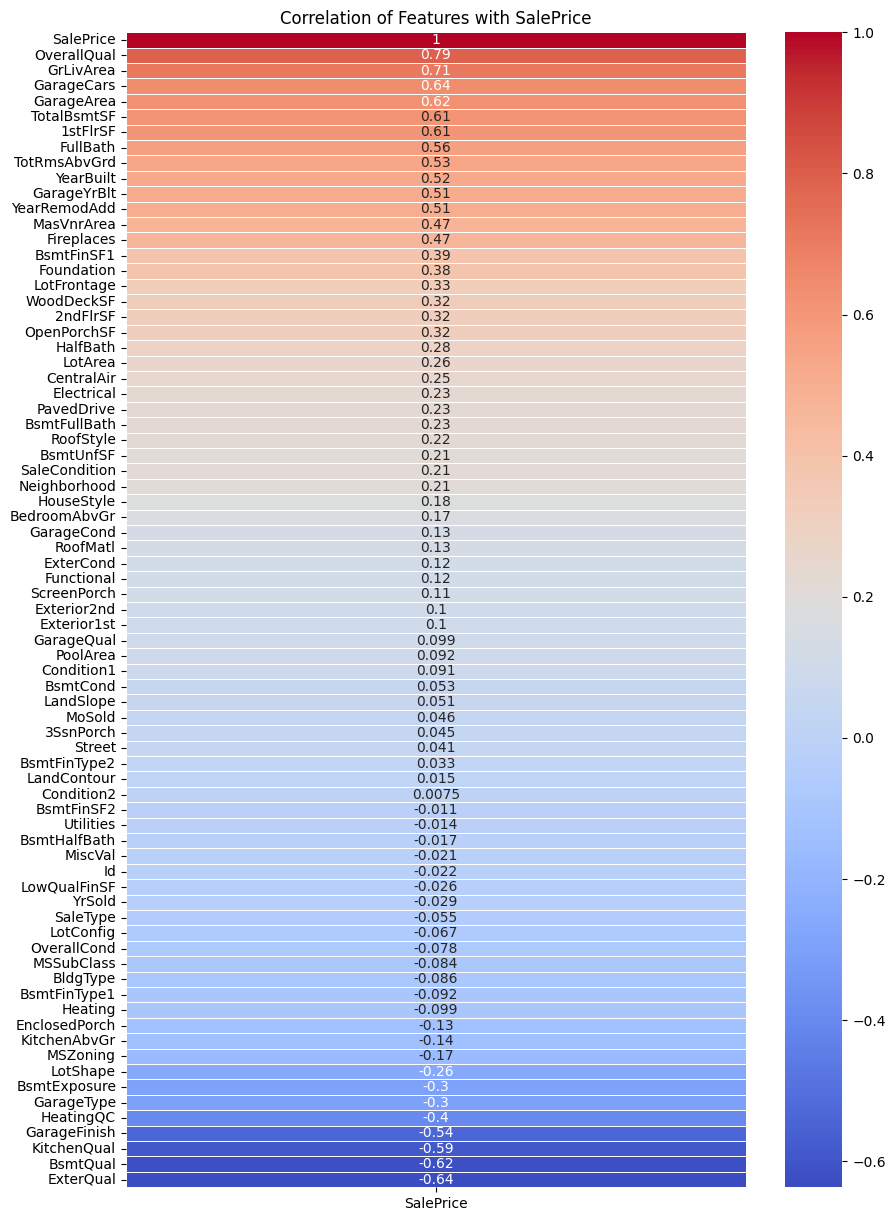

In [ ]:
# show correlations between 'SalePrice' and other variables

plt.figure(figsize=(10, 15))
sns.heatmap(train_df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features with SalePrice')
plt.show()

Variabel yang mempunyai korelasi relatif positif terhadap harga rumah yaitu Overall Quality, Ground Living Area, Garage Size in Cars, dan sebagainya.

Variabel yang mempunyai korelasi relatif negatif terhadap harga rumah yaitu ExterQual, BsmtQual, KitchenQual, dan sebagainya.

# Model

## Pendekatan 1

Menggunakan variable-variable yang mempunyai korelasi positif dengan SalePrice sebagai feature untuk training model.

Saya melakukan looping dari top 1 sampai top 15 variabel yang mempunyai korelasi positif dengan SalePrice.

In [ ]:
# get top 15 variables

correlation = train_df.corr()['SalePrice'].sort_values(ascending=False)

top_15_features = correlation[1:].head(15)
print(top_15_features)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
GarageYrBlt     0.508043
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
BsmtFinSF1      0.386420
Foundation      0.382479
Name: SalePrice, dtype: float64


In [ ]:
top_15_features.index

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'GarageYrBlt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'Foundation'],
      dtype='object')

Try from top 1 until top 15 features to find the best model.

In [ ]:
top_15_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'GarageYrBlt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'Foundation']

X = train_df[top_15_features]
y = train_df['SalePrice']

In [ ]:
# split data from train data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

results = []

for num_vars in range(1, 16):
    X_train_subset = X_train[top_15_features[:num_vars]]
    X_test_subset = X_test[top_15_features[:num_vars]]

    X_train_subset = pipeline.fit_transform(X_train_subset)
    X_test_subset = pipeline.transform(X_test_subset)

    model = LinearRegression()

    # train n predict
    model.fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)

    # evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append([num_vars, mse, rmse, r2])

# create df
results_df = pd.DataFrame(results, columns=['Number of Features', 'MSE', 'RMSE', 'R-squared'])
results_df

,Number of Features,MSE,RMSE,R-squared
0,1,2.483429e+09,49834.015357,0.644111
1,2,1.775813e+09,42140.397063,0.745516
2,3,1.672668e+09,40898.267040,0.760297
3,4,1.641175e+09,40511.413174,0.764810
4,5,1.439851e+09,37945.362075,0.793661
5,6,1.435575e+09,37888.983915,0.794274
6,7,1.438147e+09,37922.909720,0.793905
7,8,1.437192e+09,37910.309755,0.794042
8,9,1.406267e+09,37500.226154,0.798474
9,10,1.402809e+09,37454.087941,0.798970


Best: Model using top 14 features

## Pendekatan 2

Menggunakan Recursive Feature Elimination (RFE)

Saya melakukan looping dari n_features_to_select = 1 sampai 15 untuk mencari model terbaik

In [ ]:
X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.feature_selection import RFE

results = []

for n_features in range(1, 16):

    model = LinearRegression()

    # do RFE
    rfe = RFE(model, n_features_to_select=n_features)
    fit = rfe.fit(X_train, y_train)

    X_train_rfe = X_train.loc[:, fit.support_]
    X_test_rfe = X_test.loc[:, fit.support_]

    X_train_rfe = pipeline.fit_transform(X_train_rfe)
    X_test_rfe = pipeline.transform(X_test_rfe)

    # train n predict
    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)

    # evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append([n_features, mse, rmse, r2])

# create df
results_df = pd.DataFrame(results, columns=['Number of Features (RFE)', 'MSE', 'RMSE', 'R-squared'])
results_df

,Number of Features (RFE),MSE,RMSE,R-squared
0,1,2.483429e+09,49834.015357,0.644111
1,2,2.545861e+09,50456.521322,0.635164
2,3,2.323463e+09,48202.313318,0.667035
3,4,2.231497e+09,47238.727140,0.680214
4,5,2.225293e+09,47173.008970,0.681103
5,6,2.141360e+09,46274.831381,0.693131
6,7,2.141166e+09,46272.730175,0.693159
7,8,1.943260e+09,44082.418826,0.721520
8,9,1.837528e+09,42866.399714,0.736672
9,10,1.838512e+09,42877.872975,0.736531


Best: Model dengan 15 feature. Sepertinya metode RFE kurang baik digunakan karena score R-squared nya sedikit rendah daripada Pendekatan 1

## Pendekatan 3

Menggunakan variabel gabungan yang mempunyai korelasi relatif positif kuat (> 0.5) dan negatif kuat (< -0.5) sebagai feature.

In [ ]:
top_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'GarageYrBlt', 'YearRemodAdd',
                'GarageFinish', 'KitchenQual', 'BsmtQual', 'ExterQual']

X = train_df[top_features]
y = train_df['SalePrice']

In [ ]:
# split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

In [ ]:
results = []

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

model = LinearRegression()

# train n predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

results.append([len(top_features), mse, rmse, r2])

# create df
results_df = pd.DataFrame(results, columns=['Number of Features (Combination)', 'MSE', 'RMSE', 'R-squared'])
results_df

,Number of Features (Combination),MSE,RMSE,R-squared
0,15,1.198578e+09,34620.479428,0.828237


## Kesimpulan

Pendekatan terbaik: Pendekatan 3, yaitu menggunakan variabel gabungan yang mempunyai korelasi relatif positif kuat (> 0.5) dan negatif kuat (< -0.5) sebagai feature.

**Final Model**

In [ ]:
top_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'GarageYrBlt', 'YearRemodAdd',
                'GarageFinish', 'KitchenQual', 'BsmtQual', 'ExterQual']

X = train_df[top_features]
y = train_df['SalePrice']

In [ ]:
# split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

In [ ]:
results = []

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

model = LinearRegression()

# train n predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

results.append([len(top_features), mse, rmse, r2])

# create df
results_df = pd.DataFrame(results, columns=['Number of Features (Combination)', 'MSE', 'RMSE', 'R-squared'])
results_df

,Number of Features (Combination),MSE,RMSE,R-squared
0,15,1.198578e+09,34620.479428,0.828237


Kesimpulan: Model yang dihasilkan dari pendekatan 3 dapat dikatakan cukup baik berdasarkan hasil evaluasi MSE, RMSE, dan R-squared yang dihasilkan.

R-squared dari model ini bernilai 0.828, artinya model dapat dikatakan cukup baik dalam memprediksi harga rumah.